# Fisher's linear discriminant

- Author: Zhihan Yang
- Date: Friday, March 27, 2020

In [2]:
import numpy as np
from scipy.stats import gaussian_kde
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(len(x_train), 28 * 28)
x_test = x_test.reshape(len(x_test), 28 * 28)

## Reduce data dimension

Motivation for PCA before LDA: https://stats.stackexchange.com/questions/247720/why-is-within-class-scatter-matrix-in-lda-singular

In [5]:
pca = PCA(n_components=50).fit(x_train)
# use PCA(0.90).fit(x_train) and then pca.n_components_
# to search for the appropriate number of components without significant compression

In [7]:
x_train_transformed, x_test_transformed = pca.transform(x_train), pca.transform(x_test)

In [8]:
x_train_transformed.shape, x_train_transformed.max(), x_train_transformed.min()

((60000, 50), 2363.324055373632, -1507.422023441816)

In [9]:
ones = x_train_transformed[y_train == 1]
ones_test = x_test_transformed[y_test == 1]
one_labels = np.zeros(len(ones))

sevens = x_train_transformed[y_train == 7]
sevens_test = x_test_transformed[y_test == 7]
seven_labels = np.zeros(len(sevens))

In [10]:
ones.shape, sevens.shape

((6742, 50), (6265, 50))

## Compute Fisher's linear discriminant

Fisher's linear discrimiant is proportional to:
$$\vec{w} = S_W (\vec{m}_2 - \vec{m}_1)$$

Compute $\vec{m}_2$ and $\vec{m}_1$:

In [11]:
m1 = np.mean(ones, axis=0)
m2 = np.mean(sevens, axis=0)
m1.shape, m2.shape

((50,), (50,))

Compute $S_W$ using vectorization:

$$S_{W} = \sum_{n \in C_{1}}\left(\vec{x}^{n}-\vec{m}_{1}\right)\left(\vec{x}^{n}-\vec{m}_{1}\right)^{T}+\sum_{n \in C_{2}}\left(\vec{x}^{n}-\vec{m}_{2}\right)\left(\vec{x}^{n}-\vec{m}_{2}\right)^{T}$$

- `ones`: $n_1$ by 784
- `m1`: 784 (broadcasted to $n_1$ by 784)
- Draw matrix diagrams on a piece of paper and you will understand this vectorization immediately.

In [13]:
Sw = (ones - m1).T @ (ones - m1) + (sevens - m2).T @ (sevens - m2)

In [14]:
Sw.shape, Sw.max(), Sw.min()

((50, 50), 1731108116.2574472, -616938063.2372075)

Compute $\vec{w}$ using an arbitrarily chosen proportionality constant of 1:

In [15]:
w = np.linalg.inv(Sw) @ (m2 - m1).reshape(-1, 1)
w.shape

(50, 1)

Project data onto $\vec{w}$:

In [19]:
ones_train_proj = ones @ w
sevens_train_proj = sevens @ w

In [17]:
ones_test_proj = ones_test @ w
sevens_test_proj = sevens_test @ w

Plot the distribution of (scalar) projections:

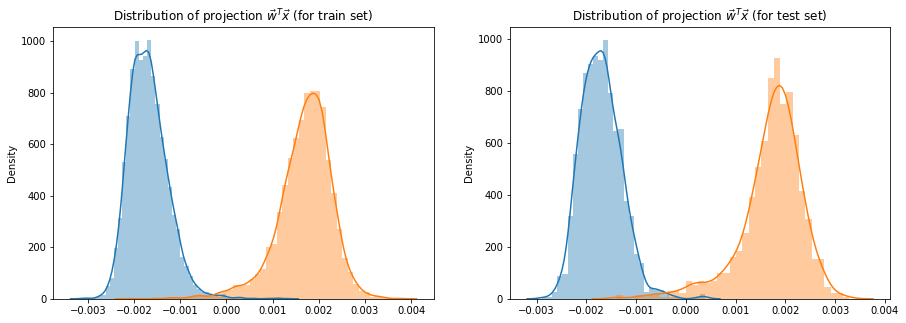

In [31]:
fig = plt.figure(figsize=(15, 5))

fig.add_subplot(121)

sns.distplot(ones_train_proj)
sns.distplot(sevens_train_proj)

plt.title(r'Distribution of projection $\vec{w}^T \vec{x}$ (for train set)')
plt.ylabel('Density')

fig.add_subplot(122)

sns.distplot(ones_test_proj)
sns.distplot(sevens_test_proj)

plt.title(r'Distribution of projection $\vec{w}^T \vec{x}$ (for test set)')
plt.ylabel('Density')

plt.show()